# SMA_移动平均及双均线模型

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
# plt.style.use('seaborn')             ggplot;
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'               #解决一些字体显示乱码问题
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；

In [3]:
import numpy as np
import pandas as pd
import tushare as ts

### 数据准备

In [25]:
data=pd.read_csv(r'D:\Nutstore\Backtrader\EURUSD_H4.csv')

In [26]:
data.head()    #DataFrame数据结构

,Time (UTC),Open,High,Low,Close,Volume
0,2010.01.01 00:00:00,1.43283,1.43306,1.43181,1.43209,9999.4
1,2010.01.01 04:00:00,1.43218,1.43346,1.43182,1.43324,12324.1
2,2010.01.01 08:00:00,1.43297,1.43346,1.43218,1.43306,18182.8
3,2010.01.01 12:00:00,1.43321,1.43354,1.43207,1.43337,15405.0
4,2010.01.01 16:00:00,1.43337,1.43356,1.43225,1.43342,13920.0


In [27]:
data.rename(columns={'Time (UTC)':'date'},inplace=True)

In [28]:
data.set_index('date', inplace = True)   #设置索引；替换，真实覆盖；

In [29]:
data.head()

,Open,High,Low,Close,Volume
date,,,,,
2010.01.01 00:00:00,1.43283,1.43306,1.43181,1.43209,9999.4
2010.01.01 04:00:00,1.43218,1.43346,1.43182,1.43324,12324.1
2010.01.01 08:00:00,1.43297,1.43346,1.43218,1.43306,18182.8
2010.01.01 12:00:00,1.43321,1.43354,1.43207,1.43337,15405.0
2010.01.01 16:00:00,1.43337,1.43356,1.43225,1.43342,13920.0


In [30]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume '], dtype='object')

In [31]:
data.drop('Volume ',axis=1).head()

,Open,High,Low,Close
date,,,,
2010.01.01 00:00:00,1.43283,1.43306,1.43181,1.43209
2010.01.01 04:00:00,1.43218,1.43346,1.43182,1.43324
2010.01.01 08:00:00,1.43297,1.43346,1.43218,1.43306
2010.01.01 12:00:00,1.43321,1.43354,1.43207,1.43337
2010.01.01 16:00:00,1.43337,1.43356,1.43225,1.43342


In [36]:
data.index=pd.to_datetime(data.index)    #将index转换为时间格式

In [37]:
data.head()

,Open,High,Low,Close,Volume
date,,,,,
2010-01-01 00:00:00,1.43283,1.43306,1.43181,1.43209,9999.4
2010-01-01 04:00:00,1.43218,1.43346,1.43182,1.43324,12324.1
2010-01-01 08:00:00,1.43297,1.43346,1.43218,1.43306,18182.8
2010-01-01 12:00:00,1.43321,1.43354,1.43207,1.43337,15405.0
2010-01-01 16:00:00,1.43337,1.43356,1.43225,1.43342,13920.0


In [38]:
data['SMA_10'] = data['Close'].rolling(20).mean()      #10日均线

In [39]:
data['SMA_20'] = data['Close'].rolling(60).mean()      #20日均线

In [40]:
data.tail()

,Open,High,Low,Close,Volume,SMA_10,SMA_20
date,,,,,,,
2020-05-01 04:00:00,1.09450,1.09697,1.09439,1.09646,30562.3500,1.087865,1.084608
2020-05-01 08:00:00,1.09645,1.09899,1.09586,1.09729,39515.8300,1.088608,1.084782
2020-05-01 12:00:00,1.09731,1.10187,1.09716,1.09976,56599.8100,1.089400,1.084993
2020-05-01 16:00:00,1.09977,1.09994,1.09746,1.09793,33328.1400,1.089865,1.085186
2020-05-01 20:00:00,1.09791,1.09822,1.09732,1.09777,2942.3787,1.090573,1.085380


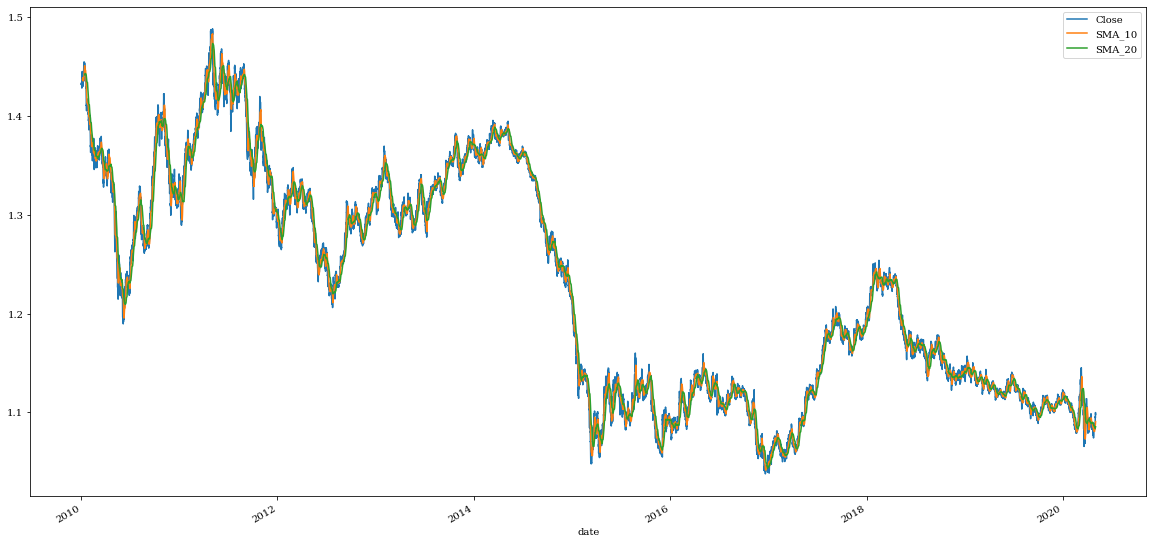

In [43]:
data[['Close','SMA_10','SMA_20']].plot(figsize = (20,10))    #可视化

#### 时间太长了，只取近期一年的数据

In [44]:
data_1=data['2020-01-01':'2020-04-30']            #时间序列的切片索引
data_1.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_20
date,,,,,,,
2020-01-01 20:00:00,1.12143,1.12218,1.12142,1.12188,1401.66,1.118962,1.112994
2020-01-02 00:00:00,1.12188,1.12245,1.12124,1.12132,9592.29,1.119435,1.113127
2020-01-02 04:00:00,1.12132,1.12143,1.12008,1.12098,16166.31,1.119837,1.113259
2020-01-02 08:00:00,1.12099,1.12141,1.11842,1.11848,30225.81,1.120024,1.113354
2020-01-02 12:00:00,1.11847,1.12023,1.11700,1.12005,359343.90,1.120212,1.113479


In [46]:
#return
data_1['Returns'] = np.log(data_1['Close'] / data_1['Close'].shift(1))     
#Numpy向量化操作，避免循环；

In [48]:
data_1['Returns_dis'] = data_1['Close']/data_1['Close'].shift(1)-1

In [50]:
data_1['Return_dis2'] = data_1['Close'].pct_change()      #当前元素与先前元素之间的百分比变化

In [53]:
data_1.head(20)        #比较一下三种方法计算的结果

,Open,High,Low,Close,Volume,SMA_10,SMA_20,Returns,Returns_dis,Return_dis2
date,,,,,,,,,,
2020-01-01 20:00:00,1.12143,1.12218,1.12142,1.12188,1401.660,1.118962,1.112994,NaN,NaN,NaN
2020-01-02 00:00:00,1.12188,1.12245,1.12124,1.12132,9592.290,1.119435,1.113127,-0.000499,-0.000499,-0.000499
2020-01-02 04:00:00,1.12132,1.12143,1.12008,1.12098,16166.310,1.119837,1.113259,-0.000303,-0.000303,-0.000303
2020-01-02 08:00:00,1.12099,1.12141,1.11842,1.11848,30225.810,1.120024,1.113354,-0.002233,-0.002230,-0.002230
2020-01-02 12:00:00,1.11847,1.12023,1.11700,1.12005,359343.900,1.120212,1.113479,0.001403,0.001404,0.001404
2020-01-02 16:00:00,1.12006,1.12030,1.11635,1.11663,64730.470,1.120107,1.113564,-0.003058,-0.003053,-0.003053
2020-01-02 20:00:00,1.11662,1.11735,1.11659,1.11708,7160.348,1.120104,1.113656,0.000403,0.000403,0.000403
2020-01-03 00:00:00,1.11707,1.11784,1.11695,1.11720,14820.590,1.120058,1.113726,0.000107,0.000107,0.000107
2020-01-03 04:00:00,1.11720,1.11749,1.11521,1.11532,19009.970,1.119829,1.113771,-0.001684,-0.001683,-0.001683


In [55]:
data_1['Position'] = np.where(data_1['SMA_10'] > data_1['SMA_20'], 1, -1)       #很重要，要重点掌握该方法

In [60]:
data_1.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_20,Returns,Returns_dis,Return_dis2,Position
date,,,,,,,,,,,
2020-01-01 20:00:00,1.12143,1.12218,1.12142,1.12188,1401.66,1.118962,1.112994,NaN,NaN,NaN,1
2020-01-02 00:00:00,1.12188,1.12245,1.12124,1.12132,9592.29,1.119435,1.113127,-0.000499,-0.000499,-0.000499,1
2020-01-02 04:00:00,1.12132,1.12143,1.12008,1.12098,16166.31,1.119837,1.113259,-0.000303,-0.000303,-0.000303,1
2020-01-02 08:00:00,1.12099,1.12141,1.11842,1.11848,30225.81,1.120024,1.113354,-0.002233,-0.002230,-0.002230,1
2020-01-02 12:00:00,1.11847,1.12023,1.11700,1.12005,359343.90,1.120212,1.113479,0.001403,0.001404,0.001404,1


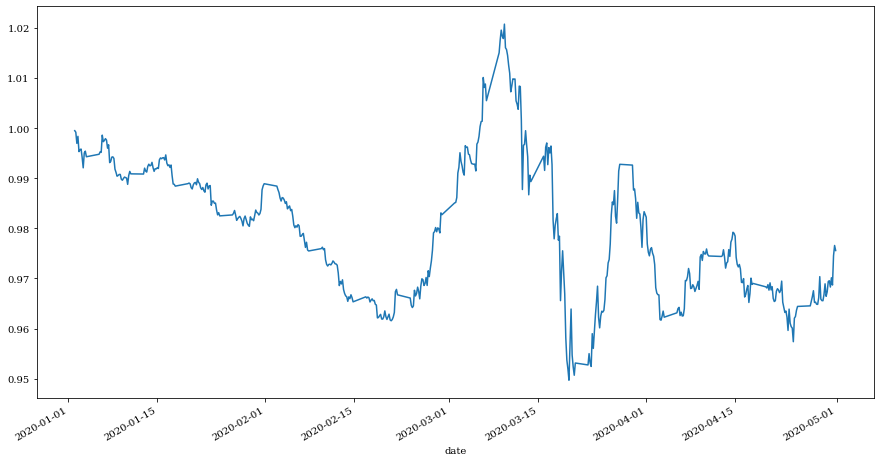

In [61]:
data_1['Returns'].cumsum().apply(np.exp).plot(figsize=(15, 8))  
#可视化；计算累计收益，连续下的算法；

## SMA策略开发

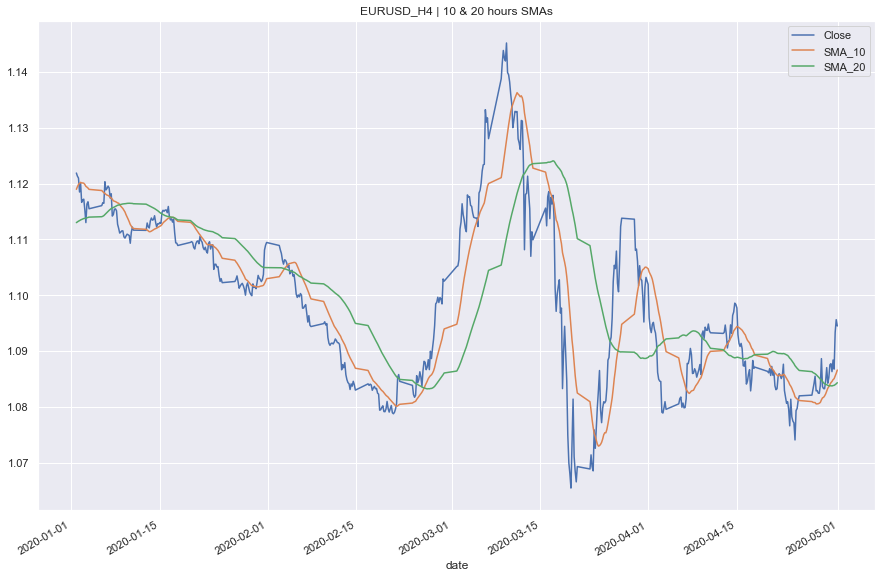

In [65]:
seaborn.set()
data_1[['Close','SMA_10','SMA_20']].plot(title='EURUSD_H4 | 10 & 20 hours SMAs',
                                       figsize=(15, 10))
#Pandas里面如何选择多列必须要掌握；

In [66]:
data_1.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_20,Returns,Returns_dis,Return_dis2,Position
date,,,,,,,,,,,
2020-01-01 20:00:00,1.12143,1.12218,1.12142,1.12188,1401.66,1.118962,1.112994,NaN,NaN,NaN,1
2020-01-02 00:00:00,1.12188,1.12245,1.12124,1.12132,9592.29,1.119435,1.113127,-0.000499,-0.000499,-0.000499,1
2020-01-02 04:00:00,1.12132,1.12143,1.12008,1.12098,16166.31,1.119837,1.113259,-0.000303,-0.000303,-0.000303,1
2020-01-02 08:00:00,1.12099,1.12141,1.11842,1.11848,30225.81,1.120024,1.113354,-0.002233,-0.002230,-0.002230,1
2020-01-02 12:00:00,1.11847,1.12023,1.11700,1.12005,359343.90,1.120212,1.113479,0.001403,0.001404,0.001404,1


In [67]:
data_1.dropna(inplace=True)     #去掉空值，NaN

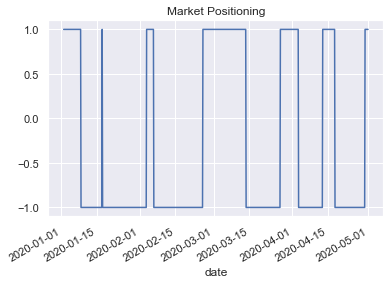

In [68]:
data_1['Position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')

### 3. 计算策略年化收益并可视化

In [69]:
data_1.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_20,Returns,Returns_dis,Return_dis2,Position
date,,,,,,,,,,,
2020-01-02 00:00:00,1.12188,1.12245,1.12124,1.12132,9592.29,1.119435,1.113127,-0.000499,-0.000499,-0.000499,1
2020-01-02 04:00:00,1.12132,1.12143,1.12008,1.12098,16166.31,1.119837,1.113259,-0.000303,-0.000303,-0.000303,1
2020-01-02 08:00:00,1.12099,1.12141,1.11842,1.11848,30225.81,1.120024,1.113354,-0.002233,-0.002230,-0.002230,1
2020-01-02 12:00:00,1.11847,1.12023,1.11700,1.12005,359343.90,1.120212,1.113479,0.001403,0.001404,0.001404,1
2020-01-02 16:00:00,1.12006,1.12030,1.11635,1.11663,64730.47,1.120107,1.113564,-0.003058,-0.003053,-0.003053,1


In [ ]:
# data['returns_dis'] = data['price']/data['price'].shift(1)-1    #离散计算return方法1

In [ ]:
# data['return_dis2'] = data['price'].pct_change()                #离散计算return方法2

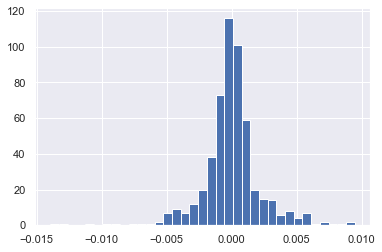

In [70]:
data_1['Returns'].hist(bins=35)

In [72]:
data_1['strategy'] = data_1['Position'].shift(1) * data_1['Returns']     
#注意未来函数；一般会使得回测收益高估；

In [74]:
data_1[['Returns', 'strategy']].sum().apply(lambda x: format(x, '.2%'))   转换成百分比

Returns     -2.47%
strategy    -1.07%
dtype: object

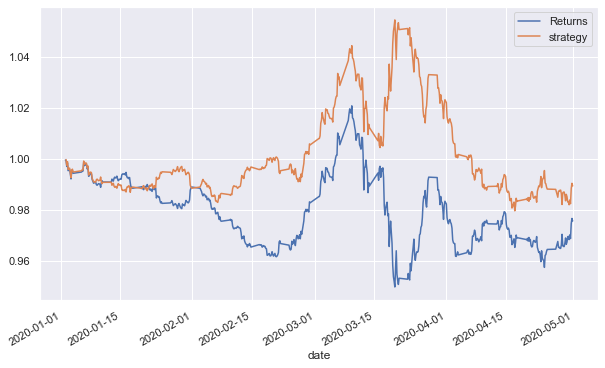

In [75]:
data_1[['Returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))   #可视化；离散的计算方法参考Momoentum策略

### 4. 策略收益风险评估

In [80]:
data_1[['Returns', 'strategy']].mean()* 252   #年化收益率；

Returns    -0.011691
strategy   -0.005073
dtype: float64

In [81]:
data_1[['Returns', 'strategy']].std() * 252 ** 0.5   #年化风险；

Returns     0.038052
strategy    0.038093
dtype: float64

In [82]:
data_1['cumret'] = data_1['strategy'].cumsum().apply(np.exp)

In [83]:
data_1['cummax'] = data_1['cumret'].cummax()

In [84]:
data_1.tail()

,Open,High,Low,Close,Volume,SMA_10,SMA_20,Returns,Returns_dis,Return_dis2,Position,strategy,cumret,cummax
date,,,,,,,,,,,,,,
2020-04-30 04:00:00,1.08629,1.08912,1.08534,1.08838,42999.190,1.084860,1.083807,0.001913,0.001915,0.001915,1,0.001913,0.983833,1.05448
2020-04-30 08:00:00,1.08839,1.08888,1.08591,1.08675,53522.490,1.085039,1.083843,-0.001499,-0.001498,-0.001498,1,-0.001499,0.982359,1.05448
2020-04-30 12:00:00,1.08676,1.09726,1.08330,1.09333,109386.730,1.085497,1.083968,0.006036,0.006055,0.006055,1,0.006036,0.988307,1.05448
2020-04-30 16:00:00,1.09334,1.09636,1.09207,1.09561,49412.000,1.086003,1.084117,0.002083,0.002085,0.002085,1,0.002083,0.990368,1.05448
2020-04-30 20:00:00,1.09561,1.09589,1.09409,1.09448,13886.505,1.086585,1.084311,-0.001032,-0.001031,-0.001031,1,-0.001032,0.989347,1.05448


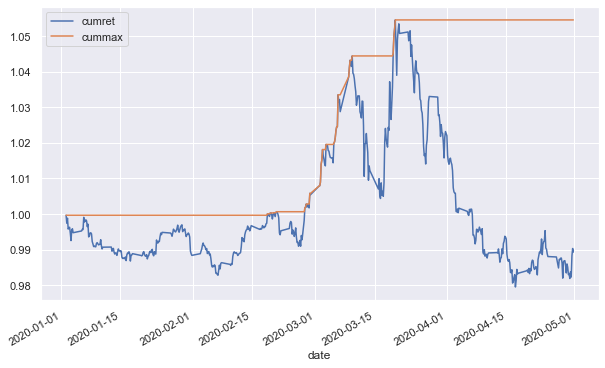

In [85]:
data_1[['cumret', 'cummax']].plot(figsize=(10, 6))

In [86]:
drawdown = (data_1['cummax'] - data_1['cumret'])

In [91]:
'最大回撤为：'+format(drawdown.max(),'.2%')        #计算原理：最大回撤；

'最大回撤为：7.49%'

### 策略的优化思路

##### 思路（一）：增加阈值

In [92]:
data_1[['Close', 'SMA_10', 'SMA_20']].tail()

,Close,SMA_10,SMA_20
date,,,
2020-04-30 04:00:00,1.08838,1.084860,1.083807
2020-04-30 08:00:00,1.08675,1.085039,1.083843
2020-04-30 12:00:00,1.09333,1.085497,1.083968
2020-04-30 16:00:00,1.09561,1.086003,1.084117
2020-04-30 20:00:00,1.09448,1.086585,1.084311


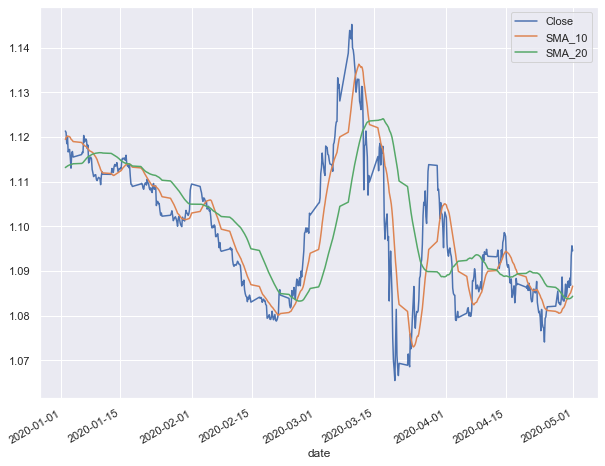

In [93]:
data_1[['Close', 'SMA_10', 'SMA_20']].plot(grid=True, figsize = (10,8))

In [94]:
data_1['10-20'] = data_1['SMA_10'] - data_1['SMA_20']
data_1['10-20'].tail()

date
2020-04-30 04:00:00    0.001052
2020-04-30 08:00:00    0.001196
2020-04-30 12:00:00    0.001529
2020-04-30 16:00:00    0.001886
2020-04-30 20:00:00    0.002274
Name: 10-20, dtype: float64

In [95]:
SD = 0.00100                     #阈值
data_1['regime'] = np.where(data_1['10-20']> SD, 1,0)
data_1['regime'] = np.where(data_1['10-20']< -SD, -1,data_1['regime'])    #核心重要；
data_1['regime'].value_counts()

-1    294
 1    174
 0     65
Name: regime, dtype: int64

In [96]:
data_1.tail(20)

,Open,High,Low,Close,Volume,SMA_10,SMA_20,Returns,Returns_dis,Return_dis2,Position,strategy,cumret,cummax,10-20,regime
date,,,,,,,,,,,,,,,,
2020-04-27 16:00:00,1.08285,1.08343,1.08165,1.08291,27591.800,1.080523,1.085579,0.000055,0.000055,0.000055,-1,-0.000055,0.987240,1.05448,-0.005056,-1
2020-04-27 20:00:00,1.08290,1.08314,1.08209,1.08245,11187.515,1.080556,1.085401,-0.000425,-0.000425,-0.000425,-1,0.000425,0.987660,1.05448,-0.004845,-1
2020-04-28 00:00:00,1.08244,1.08360,1.08226,1.08242,18458.990,1.080646,1.085168,-0.000028,-0.000028,-0.000028,-1,0.000028,0.987687,1.05448,-0.004523,-1
2020-04-28 04:00:00,1.08242,1.08408,1.08097,1.08392,35166.930,1.080796,1.084950,0.001385,0.001386,0.001386,-1,-0.001385,0.986321,1.05448,-0.004155,-1
2020-04-28 08:00:00,1.08393,1.08884,1.08370,1.08863,57747.640,1.081247,1.084784,0.004336,0.004345,0.004345,-1,-0.004336,0.982053,1.05448,-0.003537,-1
2020-04-28 12:00:00,1.08866,1.08881,1.08248,1.08362,61937.140,1.081599,1.084539,-0.004613,-0.004602,-0.004602,-1,0.004613,0.986594,1.05448,-0.002941,-1
2020-04-28 16:00:00,1.08361,1.08399,1.08252,1.08326,29219.580,1.081694,1.084298,-0.000332,-0.000332,-0.000332,-1,0.000332,0.986921,1.05448,-0.002605,-1
2020-04-28 20:00:00,1.08327,1.08342,1.08176,1.08324,9365.935,1.081946,1.084136,-0.000018,-0.000018,-0.000018,-1,0.000018,0.986940,1.05448,-0.002191,-1
2020-04-29 00:00:00,1.08324,1.08545,1.08308,1.08467,20190.760,1.082308,1.084025,0.001319,0.001320,0.001320,-1,-0.001319,0.985639,1.05448,-0.001717,-1


In [98]:
data_1.drop(['Open', 'High','Low'], axis=1, inplace=True) 
data_1.head()

,Close,Volume,SMA_10,SMA_20,Returns,Returns_dis,Return_dis2,Position,strategy,cumret,cummax,10-20,regime
date,,,,,,,,,,,,,
2020-01-02 00:00:00,1.12132,9592.29,1.119435,1.113127,-0.000499,-0.000499,-0.000499,1,NaN,NaN,NaN,0.006308,1
2020-01-02 04:00:00,1.12098,16166.31,1.119837,1.113259,-0.000303,-0.000303,-0.000303,1,-0.000303,0.999697,0.999697,0.006578,1
2020-01-02 08:00:00,1.11848,30225.81,1.120024,1.113354,-0.002233,-0.002230,-0.002230,1,-0.002233,0.997467,0.999697,0.006670,1
2020-01-02 12:00:00,1.12005,359343.90,1.120212,1.113479,0.001403,0.001404,0.001404,1,0.001403,0.998867,0.999697,0.006733,1
2020-01-02 16:00:00,1.11663,64730.47,1.120107,1.113564,-0.003058,-0.003053,-0.003053,1,-0.003058,0.995817,0.999697,0.006543,1


In [99]:
data_1['Market'] = np.log(data_1['Close']/data_1['Close'].shift(1))

In [100]:
data_1['strategy_2'] = data_1['regime'].shift(1) * data_1['Market']

In [102]:
data_1[['Market','strategy_2']].sum().apply(lambda x: format(x, '.2%'))

Market        -2.42%
strategy_2    -0.05%
dtype: object

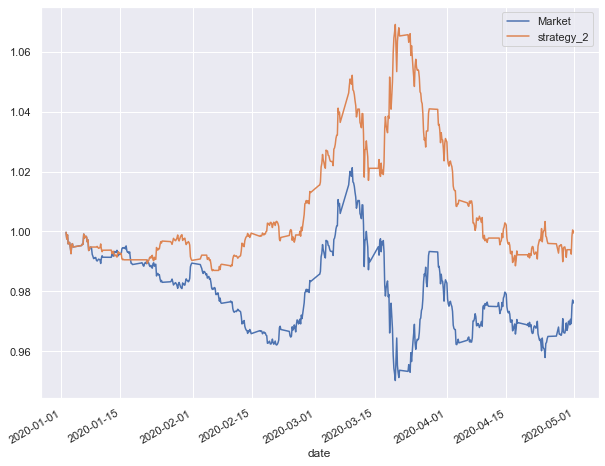

In [101]:
data_1[['Market','strategy_2']].cumsum().apply(np.exp).plot(grid=True, figsize = (10,8))

##### 思路（二）：单方向

In [ ]:
## 筛选出，position为1的列
